## ESCI 895
## Ryan Siegel
## Final Project
## Heat Flow Through Zealand River

### Import Libraries

In [85]:
import pandas as pd
import matplotlib
import numpy as np
import os
from pathlib import Path
import scipy.stats
import glob
import matplotlib.pyplot as plt

### Parameters

In [101]:
gw = Path("gw data")
sw = Path("Surface water files")
first = Path("gw data")/"gw_ll05_09_15_2025.csv"
radiation = Path('Rad_Data')
aquifer_k = 2 #W/m/K Up to change
L = 2 #Length in Meters Ground Water to Surface Water
GW_Area = 4 #Area in Sq M, based on Length Measurement Used
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m²·K⁴)
albedo = 0.06    # typical for water
emissivity = 0.97

### Function for Loading in Water Temp Data

In [87]:
def load_filtered_w_data_pivoted(folder_path):

    folder = Path(folder_path)
    all_dfs = []

    for file in folder.glob("*.csv"):
        try:
            # Extract well/site ID from filename
            well_id = file.stem  

            df = pd.read_csv(file, skiprows=11, encoding='latin1', sep=',', engine='python')
            df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='mixed', errors='coerce')
            df.dropna(subset=['DateTime'], inplace=True)
            df.set_index('DateTime', inplace=True)

            # Filter: on the hour and every two hours
            mask = (df.index.minute == 0) & (df.index.second == 0) & (df.index.hour % 2 == 0)
            filtered = df[mask].copy()

            # Drop unnecessary columns
            filtered.drop(columns=['Date', 'Time', 'ms'], errors='ignore', inplace=True)

            # Rename columns to include well ID
            filtered.columns = [f"{col}_{well_id}" for col in filtered.columns]

            # Keep only columns that contain 'TEMPERATURE' (case-insensitive)
            temperature_cols = [col for col in filtered.columns if 'TEMPERATURE' in col.upper()]
            filtered = filtered[temperature_cols]

            all_dfs.append(filtered)

        except Exception as e:
            print(f"Error processing {file.name}: {e}")

    # Combine all filtered DataFrames on DateTime index
    if all_dfs:
        combined_df = pd.concat(all_dfs, axis=1)
        combined_df.sort_index(inplace=True)
        return combined_df
    else:
        return pd.DataFrame()


### Load Groundwater Temperature Data

In [88]:
dfgw = load_filtered_w_data_pivoted(gw)
gw

WindowsPath('gw data')

### Load Surface Water Temperatures

In [89]:
dfsw = load_filtered_w_data_pivoted(sw)
dfsw

Error processing sw_ll01_06_05_2025_cond.csv: Expected 1 fields in line 14, saw 6
Error processing sw_ll01_07_14_2025_cond.csv: Expected 1 fields in line 14, saw 6
Error processing sw_ll01_08_18_2025_cond.csv: Expected 1 fields in line 14, saw 6
Error processing sw_ll11_09_15_2025_cond.csv: Expected 1 fields in line 14, saw 6


,TEMPERATURE_sw_ll01_06_03_2025,TEMPERATURE_sw_ll01_06_04_2025,TEMPERATURE_sw_ll01_09_15_2025,TEMPERATURE_sw_ll06_08_22_2025,TEMPERATURE_sw_ll06_09_15_2025,TEMPERATURE_sw_ll07_06_02_2025,TEMPERATURE_sw_ll07_09_15_2025,TEMPERATURE_sw_ll09_09_15_2025,TEMPERATURE_sw_ll10_06_02_2025,TEMPERATURE_sw_ll10_09_15_2025,TEMPERATURE_sw_ll11_08_22_2025
DateTime,,,,,,,,,,,
2025-05-30 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.285,NaN,NaN
2025-05-30 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.647,NaN,NaN
2025-05-30 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.118,NaN,NaN
2025-05-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.676,NaN,NaN
2025-05-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.306,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-15 06:00:00,NaN,NaN,11.170,NaN,11.557,NaN,11.265,NaN,NaN,12.599,NaN
2025-09-15 08:00:00,NaN,NaN,10.828,NaN,11.099,NaN,11.097,NaN,NaN,12.344,NaN
2025-09-15 10:00:00,NaN,NaN,11.425,NaN,11.698,NaN,12.506,NaN,NaN,12.501,NaN


### Compute Average GW Temperature

In [90]:
dfgw['average'] = dfgw.mean(axis=1, skipna=True)

### Compute Average SW Temperature

In [91]:
dfsw['average'] = dfsw.mean(axis=1, skipna=True)

### Time Series of Temperature Over Duration of Study Period

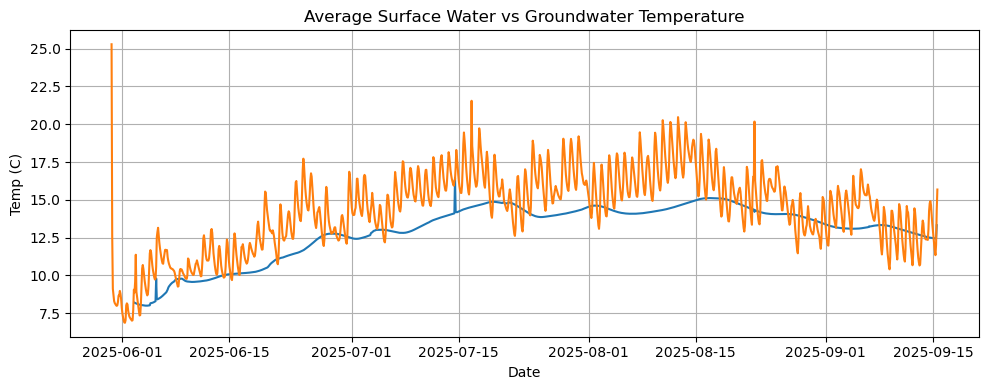

In [92]:
plt.figure(figsize=(10, 4))
plt.plot(dfgw['average'], linestyle='-')
plt.plot(dfsw['average'], linestyle='-')
plt.title('Average Surface Water vs Groundwater Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (C)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Calculate Heat Flow From Surface Water To Ground Water Due to Conduction of Aquifer Material

In [93]:
df_heatflow = pd.DataFrame({
    'GWtoSW': aquifer_k * GW_Area * (((dfsw['average'] - dfgw['average'])) / L)
})

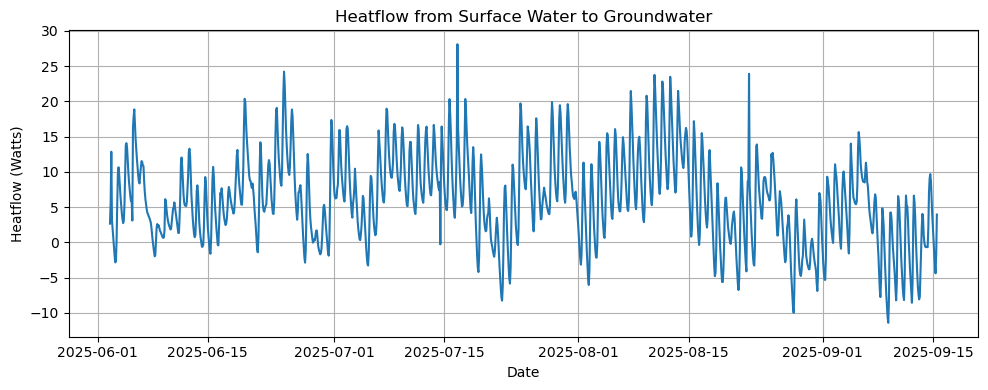

In [94]:
plt.figure(figsize=(10, 4))
plt.plot(df_heatflow['GWtoSW'], linestyle='-')
plt.title('Heatflow from Surface Water to Groundwater')
plt.xlabel('Date')
plt.ylabel('Heatflow (Watts)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Load Radiation Data

In [98]:

def load_and_resample_radiation(folder_path):
    """
    Load all CSVs in a folder, rename 'endDateTime' to 'DateTime', set as index,
    filter to inSWMean and inLWMean columns, and resample to 2-hour totals.
    """
    all_files = glob.glob(os.path.join(folder_path, '*.csv'))
    dfs = []

    for file in all_files:
        df = pd.read_csv(file, parse_dates=['endDateTime'])

        # Rename and set index
        df.rename(columns={'endDateTime': 'DateTime'}, inplace=True)
        df.set_index('DateTime', inplace=True)

        # Keep only radiation columns
        keep_cols = [col for col in df.columns if 'inSWMean' in col or 'inLWMean' in col or 'outLWMean' in col]
        df = df[keep_cols]

        # Resample to 2-hour intervals, summing radiation
        df_resampled = df.resample('2h').sum()

        dfs.append(df_resampled)

    # Combine all resampled DataFrames
    combined = pd.concat(dfs)
    combined.sort_index(inplace=True)
    return combined
dfrad = load_and_resample_radiation(radiation)
dfrad

,inSWMean,inLWMean,outLWMean
DateTime,,,
2025-05-01 00:00:00+00:00,-12.42,782.4,1057.3
2025-05-01 02:00:00+00:00,-17.40,1017.0,1381.5
2025-05-01 04:00:00+00:00,-14.31,1032.9,1361.5
2025-05-01 06:00:00+00:00,-10.67,1116.7,1368.5
2025-05-01 08:00:00+00:00,-15.63,997.2,1361.6
...,...,...,...
2025-08-31 16:00:00+00:00,3429.61,1289.6,1745.0
2025-08-31 18:00:00+00:00,3280.97,1352.5,1775.2
2025-08-31 20:00:00+00:00,1945.38,1284.2,1749.0


In [ ]:
# Convert surface temperature to Kelvin if needed
temp_K = dfsw['average'].copy()
if temp_K.max() < 200:  # assume it's in Celsius
    temp_K += 273.15

# Shortwave net (reflected portion removed)
sw_net = dfrad['inSWMean'] * (1 - albedo)

# Longwave incoming
lw_in = dfrad['inLWMean']

# Longwave outgoing: use column if available, else compute via Stefan-Boltzmann
if 'outLWMean' in dfrad.columns:
    lw_out = dfrad['outLWMean']
else:
    lw_out = emissivity * sigma * temp_K**4

# Net radiative heat flux (W/m²)
q_net = sw_net + lw_in - lw_out